In [4]:
from langchain_openai import OpenAI, ChatOpenAI
import os
from datasets import load_dataset
from pinecone import Pinecone
from tqdm.auto import tqdm
from langchain.chains import LLMMathChain
from langchain.agents import Tool, initialize_agent
from warnings import filterwarnings

filterwarnings("ignore")
os.environ["OPENAI_API_KEY"] = ""

In [3]:
from langchain.tools import BaseTool
from math import pi
from typing import Union

class CircumferenceTool(BaseTool):
    name = "Circumference Calculator"
    description = "use this tool when you need to calculate a circumference of a cirle"

    def _run(self, radius : Union[int, float]):
        return float(radius)*2.0*pi
    
    def _arun(self, radius: int):
        raise NotImplementedError("This tool doesn't support async")

In [5]:
from langchain.tools import Tool
from langchain.memory import ConversationBufferMemory

llm = ChatOpenAI(temperature=0, model = "gpt-3.5-turbo")

memory = ConversationBufferMemory(memory_key = "chat_history",
                         k=5,
                         return_messages=True)


In [7]:
from langchain.agents import initialize_agent

tools = [CircumferenceTool()]

conversation_agent = initialize_agent(
    agent = "chat-conversational-react-description",
    tools = tools,
    llm = llm,
    verbose = True,
    max_iterations = 5,
    early_stopping_method = "generate",
    memory = memory
)


In [9]:
conversation_agent.invoke("Calculate the circumference of a circle having the radius of 50 cms")



> Entering new AgentExecutor chain...
```json
{
    "action": "Circumference Calculator",
    "action_input": "50"
}
```
Observation: 314.1592653589793
Thought:```json
{
    "action": "Final Answer",
    "action_input": "314.1592653589793"
}
```

> Finished chain.


{'input': 'Calculate the circumference of a circle having the radius of 50 cms',
 'chat_history': [HumanMessage(content='Calculate the circumference of a circle having the radius of 50 cms'),
  AIMessage(content='314.1592653589793')],
 'output': '314.1592653589793'}

In [10]:
2*pi*50

314.1592653589793

In [12]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration

In [13]:
hf_model = "Salesforce/blip-image-captioning-large"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = BlipProcessor.from_pretrained(hf_model)
model = BlipForConditionalGeneration.from_pretrained(hf_model).to(device)

tokenizer_config.json: 100%|██████████| 527/527 [00:00<?, ?B/s] 
vocab.txt: 100%|██████████| 232k/232k [00:00<00:00, 748kB/s]
tokenizer.json: 100%|██████████| 711k/711k [00:00<00:00, 5.21MB/s]
special_tokens_map.json: 100%|██████████| 125/125 [00:00<00:00, 126kB/s]
config.json: 100%|██████████| 4.60k/4.60k [00:00<00:00, 4.57MB/s]
model.safetensors: 100%|██████████| 1.88G/1.88G [02:56<00:00, 10.7MB/s]


In [15]:
import requests
img_url = "https://media.istockphoto.com/id/1146517111/photo/taj-mahal-mausoleum-in-agra.jpg?s=612x612&w=0&k=20&c=vcIjhwUrNyjoKbGbAQ5sOcEzDUgOfCsm9ySmJ8gNeRk="

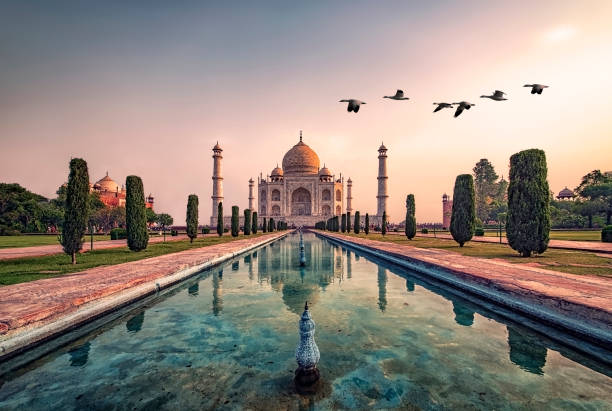

In [20]:
from PIL import Image

image = Image.open(requests.get(img_url, stream = True).raw).convert("RGB")
image

In [21]:
inputs = processor(image, return_tensors = "pt").to(device)

out = model.generate(**inputs, max_new_tokens = 20)
print(processor.decode(out[0], skip_special_tokens = True))

arafed view of a water feature with birds flying over it


In [23]:
out

tensor([[30522,  1037, 27528,  2098,  3193,  1997,  1037,  2300,  3444,  2007,
          5055,  3909,  2058,  2009,   102]], device='cuda:0')

In [22]:
desc = (
    """Use this tool when given the URL of an image that you'd like to be described. 
    It will return a simple caption describing the image"""
)

In [25]:
class ImageCaptionTool(BaseTool):
    name = "Image captioner"
    description = desc
    
    def _run(self, url:str):
        image = Image.open(requests.get(img_url, stream = True).raw).convert("RGB")
        inputs = processor(image, return_tensors = "pt").to(device)
        out = model.generate(**inputs, max_new_tokens = 20)
        caption = processor.decode(out[0], skip_special_tokens = True)
        return caption
    
    def _arun(self, query: str):
        raise NotImplementedError("This tool doesn't support async")

In [30]:
tools = [ImageCaptionTool()]
memory = ConversationBufferMemory()

multimodel_agent = initialize_agent(agent = "chat-conversational-react-description",
                                    tools = tools,
                                    llm = llm, 
                                    verbose = True,
                                    max_iteration = 10,
                                    memory = memory)

In [31]:
multimodel_agent.invoke("Can you please caption the following picture having the url: https://www.google.com/imgres?imgurl=https%3A%2F%2Fkeystoneacademic-res.cloudinary.com%2Fimage%2Fupload%2Ff_auto%2Fq_auto%2Fg_auto%2Fc_fill%2Fw_1280%2Felement%2F11%2F110845_shutterstock_255015211.jpg&tbnid=JCCortYvoTr6mM&vet=12ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ..i&imgrefurl=https%3A%2F%2Fwww.educations.com%2Fcountries%2Fcanada&docid=sUizpR8tnueCJM&w=1280&h=854&q=canada&ved=2ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ")



> Entering new AgentExecutor chain...
```json
{
    "action": "Image captioner",
    "action_input": "https://www.google.com/imgres?imgurl=https%3A%2F%2Fkeystoneacademic-res.cloudinary.com%2Fimage%2Fupload%2Ff_auto%2Fq_auto%2Fg_auto%2Fc_fill%2Fw_1280%2Felement%2F11%2F110845_shutterstock_255015211.jpg&tbnid=JCCortYvoTr6mM&vet=12ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ..i&imgrefurl=https%3A%2F%2Fwww.educations.com%2Fcountries%2Fcanada&docid=sUizpR8tnueCJM&w=1280&h=854&q=canada&ved=2ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ"
}
```
Observation: arafed view of a water feature with birds flying over it
Thought:```json
{
    "action": "Final Answer",
    "action_input": "Aerial view of a water feature with birds flying over it"
}
```

> Finished chain.


{'input': 'Can you please caption the following picture having the url: https://www.google.com/imgres?imgurl=https%3A%2F%2Fkeystoneacademic-res.cloudinary.com%2Fimage%2Fupload%2Ff_auto%2Fq_auto%2Fg_auto%2Fc_fill%2Fw_1280%2Felement%2F11%2F110845_shutterstock_255015211.jpg&tbnid=JCCortYvoTr6mM&vet=12ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ..i&imgrefurl=https%3A%2F%2Fwww.educations.com%2Fcountries%2Fcanada&docid=sUizpR8tnueCJM&w=1280&h=854&q=canada&ved=2ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ',
 'chat_history': [HumanMessage(content='Calculate the circumference of a circle having the radius of 50 cms'),
  AIMessage(content='314.1592653589793'),
  HumanMessage(content='Can you please caption the following picture having the url: https://media.istockphoto.com/id/1146517111/photo/taj-mahal-mausoleum-in-agra.jpg?s=612x612&w=0&k=20&c=vcIjhwUrNyjoKbGbAQ5sOcEzDUgOfCsm9ySmJ8gNeRk='),
  AIMessage(content='314.1592653589793'),
  HumanMessage(content='Can you please caption the followin

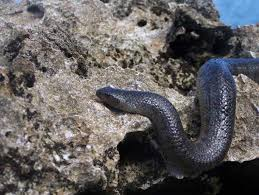

In [37]:
img_url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGjAL4hPTHW57N8X38Rz5yL5IzddxwUbmh_g&usqp=CAU"
image = Image.open(requests.get(img_url, stream = True).raw).convert("RGB")
image

In [38]:
multimodel_agent.invoke("Can you please caption the following picture having the url: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGjAL4hPTHW57N8X38Rz5yL5IzddxwUbmh_g&usqp=CAU")



> Entering new AgentExecutor chain...
```json
{
    "action": "Image captioner",
    "action_input": "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGjAL4hPTHW57N8X38Rz5yL5IzddxwUbmh_g&usqp=CAU"
}
```
Observation: arafed snake on a rock with a blue background
Thought:```json
{
    "action": "Final Answer",
    "action_input": "Arafed snake on a rock with a blue background"
}
```

> Finished chain.


{'input': 'Can you please caption the following picture having the url: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTGjAL4hPTHW57N8X38Rz5yL5IzddxwUbmh_g&usqp=CAU',
 'chat_history': [HumanMessage(content='Calculate the circumference of a circle having the radius of 50 cms'),
  AIMessage(content='314.1592653589793'),
  HumanMessage(content='Can you please caption the following picture having the url: https://media.istockphoto.com/id/1146517111/photo/taj-mahal-mausoleum-in-agra.jpg?s=612x612&w=0&k=20&c=vcIjhwUrNyjoKbGbAQ5sOcEzDUgOfCsm9ySmJ8gNeRk='),
  AIMessage(content='314.1592653589793'),
  HumanMessage(content='Can you please caption the following picture having the url: https://www.google.com/imgres?imgurl=https%3A%2F%2Fkeystoneacademic-res.cloudinary.com%2Fimage%2Fupload%2Ff_auto%2Fq_auto%2Fg_auto%2Fc_fill%2Fw_1280%2Felement%2F11%2F110845_shutterstock_255015211.jpg&tbnid=JCCortYvoTr6mM&vet=12ahUKEwjBisuDxryEAxXJFmIAHeaxCm8QMygLegUIARCMAQ..i&imgrefurl=https%3A%2F%2Fwww.educa